In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

In [87]:
df = pd.read_csv('downloaded_from_mendeley/weaving_rejection_dataset - original.csv')

In [88]:
df.head()

,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,40+40/2/40/110x80,31300.0,6.0,38286.9360,12.5,TOTAL,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,40x40/110x90,10450.0,7.0,13057.5840,14.5,TOTAL,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,40x40/110x80,900.0,11.5,1902.8640,12.5,TOTAL,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,40x40/130x80,8000.0,8.0,10093.9280,14.0,TOTAL,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,50x50/140x70,3500.0,8.1,69146.1408,9.1,TOTAL,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


In [89]:
df= df[['Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 'Shrink_allow', 'Req_grey_fabric', 
    'Req_beam_length(yds)', 'warp_count',  'weft_count','epi', 'ppi', 'Rejection']]

In [90]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,Rejection
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,double_40,80.0,110,80,285
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,40,40.0,110,90,39
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,40,40.0,110,80,0
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,40,40.0,130,80,58
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,50,50.0,140,70,1043


In [91]:
df['FF_grs'] = pd.cut(df['Req_Finish_Fabrics'],6)

In [92]:
df['Rec_BL_grs']= pd.cut(df['Rec_Beam_length(yds)'],4)

In [93]:
df['SA_grs']= pd.cut(df['Shrink_allow'], 6)

In [94]:
df['FA_grs']= pd.cut(df['Fabric_Allowance'], 6)

In [95]:
df['weft_count']= df['weft_count'].apply(lambda x : str(int(x)))

In [96]:
df['epi']= df['epi'].apply(lambda x: str(x))

In [97]:
df['ppi']= df['ppi'].apply(lambda x: str(x))

In [98]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,Rejection,FF_grs,Rec_BL_grs,SA_grs,FA_grs
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,double_40,80,110,80,285,"(28841.667, 57633.333]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,40,40,110,90,39,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,40,40,110,80,0,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,40,40,130,80,58,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,50,50,140,70,1043,"(-122.75, 28841.667]","(-248.329, 73062.049]","(5.965, 11.8]","(4.961, 11.5]"


In [99]:
X = df.copy()
y = X.pop('Rejection')

In [100]:
X.dtypes

Req_Finish_Fabrics       float64
Fabric_Allowance         float64
Rec_Beam_length(yds)     float64
Shrink_allow             float64
Req_grey_fabric          float64
Req_beam_length(yds)     float64
warp_count                object
weft_count                object
epi                       object
ppi                       object
FF_grs                  category
Rec_BL_grs              category
SA_grs                  category
FA_grs                  category
dtype: object

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [103]:
X_train.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,FF_grs,Rec_BL_grs,SA_grs,FA_grs
2569,250.0,22.0,382.760,23.0,320.512821,380.624009,40,40,110,90,"(-122.75, 28841.667]","(-248.329, 73062.049]","(17.6, 23.4]","(18.0, 24.5]"
2976,100.0,37.2,153.104,15.1,159.235669,171.503965,40,40,100,70,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(31.0, 37.5]"
13508,4750.0,10.2,136.700,17.0,5289.532294,5827.478488,40,40,120,80,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
5169,2250.0,8.2,2673.852,8.2,2450.980392,2441.398392,50,50,150,96,"(-122.75, 28841.667]","(-248.329, 73062.049]","(5.965, 11.8]","(4.961, 11.5]"
15152,2150.0,8.2,2679.320,13.4,2342.047930,2472.973059,50,50,130,80,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"


# OHE 

In [104]:
from sklearn.preprocessing import OneHotEncoder

In [105]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [106]:
ohe_cols = [i for i in X_train.columns if len(X_train[i].value_counts())<30]

In [107]:
non_ohe_cols = [j for j in X_train.columns if j not in ohe_cols]

In [108]:
ohe_df = pd.DataFrame(ohe.fit_transform(X_train[ohe_cols]).toarray())

In [109]:
ohe_df.index = X_train.index

In [110]:
X_train_ohe = pd.concat([X_train[non_ohe_cols], ohe_df], axis=1)

In [111]:
ohe_df_test = pd.DataFrame(ohe.transform(X_test[ohe_cols]).toarray())
ohe_df_test.index = X_test.index

In [112]:
X_test_ohe = pd.concat([X_test[non_ohe_cols], ohe_df_test], axis=1)

In [113]:
X_test_ohe.shape, X_train_ohe.shape, X_train.shape

((4402, 86), (17608, 86), (17608, 14))

In [114]:
X_train_ohe.columns= X_train_ohe.columns.astype(str)
X_test_ohe.columns = X_test_ohe.columns.astype(str)

In [115]:
X_train_ohe.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),0,1,2,3,...,70,71,72,73,74,75,76,77,78,79
2569,250.0,22.0,382.760,23.0,320.512821,380.624009,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2976,100.0,37.2,153.104,15.1,159.235669,171.503965,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13508,4750.0,10.2,136.700,17.0,5289.532294,5827.478488,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5169,2250.0,8.2,2673.852,8.2,2450.980392,2441.398392,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15152,2150.0,8.2,2679.320,13.4,2342.047930,2472.973059,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# scaling

In [116]:
from sklearn.preprocessing import StandardScaler
 
sc = StandardScaler()

X_train_ohe_sc = pd.DataFrame(sc.fit_transform(X_train_ohe), columns= X_train_ohe.columns)

X_test_ohe_sc = pd.DataFrame(sc.transform(X_test_ohe), columns= X_test_ohe.columns)



In [117]:
X_train_ohe_sc.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),0,1,2,3,...,70,71,72,73,74,75,76,77,78,79
0,-0.438371,3.496171,-0.360767,3.218992,-0.436927,-0.434815,-0.028209,-0.031087,-0.139687,-0.201648,...,5.314995,-0.069647,-0.045888,-0.031087,-2.398236,-0.369576,7.042564,-0.036165,-0.076332,-0.032867
1,-0.445170,7.619913,-0.370530,0.575475,-0.443708,-0.443216,-0.028209,-0.031087,-0.139687,-0.201648,...,-0.188147,-0.069647,-0.045888,-0.031087,-2.398236,-0.369576,-0.141994,-0.036165,13.100666,-0.032867
2,-0.234413,0.294845,-0.371227,1.211257,-0.228011,-0.216000,-0.028209,-0.031087,-0.139687,-0.201648,...,-0.188147,-0.069647,-0.045888,-0.031087,0.416973,-0.369576,-0.141994,-0.036165,-0.076332,-0.032867
3,-0.347723,-0.247752,-0.263374,-1.733420,-0.347354,-0.352028,-0.028209,-0.031087,-0.139687,-0.201648,...,-0.188147,-0.069647,-0.045888,-0.031087,0.416973,-0.369576,-0.141994,-0.036165,-0.076332,-0.032867
4,-0.352256,-0.247752,-0.263142,0.006616,-0.351934,-0.350760,-0.028209,-0.031087,-0.139687,-0.201648,...,-0.188147,-0.069647,-0.045888,-0.031087,0.416973,-0.369576,-0.141994,-0.036165,-0.076332,-0.032867


In [118]:
X_all = pd.concat([X_train_ohe_sc, X_test_ohe_sc], axis=0)
y_all = pd.concat([y_train, y_test], axis=0)

In [119]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

In [125]:
from sklearn.metrics import r2_score
def calculate_r2_score(models, X_train, y_train, X_test):
    r2_dict ={}
    for model_name, model in models.items():
        model.fit(X_train_ohe_sc, y_train)
        y_pred = model.predict(X_test_ohe_sc)
        r2_score_ = r2_score(y_test, y_pred)
        r2_dict[model_name] = r2_score_
    return r2_scores_df

In [127]:
# r2_dict_df = calculate_r2_score(models, X_train_ohe_sc, y_train, X_test_ohe_sc)

In [63]:
r2_score_list ={}
for model_name, model in models.items():
    print(model)
    model.fit(X_train_ohe_sc, y_train)
    y_pred = model.predict(X_test_ohe_sc)
    r2_score_ = r2_score(y_test, y_pred)
    r2_score_list[model_name] = r2_score_
 

LGBMRegressor()
RandomForestRegressor()
Learning rate set to 0.064417
0:	learn: 156.2126115	total: 15.6ms	remaining: 15.6s
1:	learn: 149.1868118	total: 18.9ms	remaining: 9.41s
2:	learn: 142.8874551	total: 22ms	remaining: 7.31s
3:	learn: 136.9245569	total: 24.8ms	remaining: 6.18s
4:	learn: 131.3350554	total: 27.7ms	remaining: 5.52s
5:	learn: 126.2702406	total: 30.8ms	remaining: 5.1s
6:	learn: 121.6158906	total: 33.2ms	remaining: 4.71s
7:	learn: 117.3398360	total: 35.6ms	remaining: 4.42s
8:	learn: 113.2937166	total: 38.5ms	remaining: 4.24s
9:	learn: 109.4578853	total: 41.3ms	remaining: 4.08s
10:	learn: 106.0016303	total: 44.1ms	remaining: 3.96s
11:	learn: 102.8107645	total: 46.9ms	remaining: 3.86s
12:	learn: 99.8200483	total: 49.6ms	remaining: 3.76s
13:	learn: 97.1686918	total: 52ms	remaining: 3.66s
14:	learn: 94.6058040	total: 54.4ms	remaining: 3.57s
15:	learn: 92.3633826	total: 57ms	remaining: 3.5s
16:	learn: 90.2036546	total: 59.8ms	remaining: 3.46s
17:	learn: 88.1986826	total: 63ms	r

215:	learn: 52.2544264	total: 590ms	remaining: 2.14s
216:	learn: 52.2274030	total: 593ms	remaining: 2.14s
217:	learn: 52.1590102	total: 596ms	remaining: 2.14s
218:	learn: 52.0165836	total: 598ms	remaining: 2.13s
219:	learn: 51.9622958	total: 601ms	remaining: 2.13s
220:	learn: 51.9271253	total: 603ms	remaining: 2.13s
221:	learn: 51.7935666	total: 606ms	remaining: 2.12s
222:	learn: 51.6573048	total: 608ms	remaining: 2.12s
223:	learn: 51.6289614	total: 611ms	remaining: 2.12s
224:	learn: 51.5924730	total: 613ms	remaining: 2.11s
225:	learn: 51.5602121	total: 616ms	remaining: 2.11s
226:	learn: 51.5429993	total: 619ms	remaining: 2.11s
227:	learn: 51.5171287	total: 622ms	remaining: 2.1s
228:	learn: 51.4982681	total: 624ms	remaining: 2.1s
229:	learn: 51.4467067	total: 627ms	remaining: 2.1s
230:	learn: 51.4036144	total: 630ms	remaining: 2.1s
231:	learn: 51.3648607	total: 633ms	remaining: 2.1s
232:	learn: 51.3408491	total: 637ms	remaining: 2.1s
233:	learn: 51.3111628	total: 640ms	remaining: 2.09s

424:	learn: 47.2669172	total: 1.18s	remaining: 1.6s
425:	learn: 47.2548784	total: 1.19s	remaining: 1.6s
426:	learn: 47.2447504	total: 1.19s	remaining: 1.59s
427:	learn: 47.2390525	total: 1.19s	remaining: 1.59s
428:	learn: 47.2290558	total: 1.19s	remaining: 1.59s
429:	learn: 47.2057060	total: 1.2s	remaining: 1.58s
430:	learn: 47.1908925	total: 1.2s	remaining: 1.58s
431:	learn: 47.1702970	total: 1.2s	remaining: 1.58s
432:	learn: 47.1588158	total: 1.2s	remaining: 1.58s
433:	learn: 47.1488520	total: 1.21s	remaining: 1.57s
434:	learn: 47.1356202	total: 1.21s	remaining: 1.57s
435:	learn: 47.1258681	total: 1.21s	remaining: 1.57s
436:	learn: 47.1155591	total: 1.22s	remaining: 1.57s
437:	learn: 47.1035645	total: 1.22s	remaining: 1.56s
438:	learn: 47.0933896	total: 1.22s	remaining: 1.56s
439:	learn: 47.0819341	total: 1.22s	remaining: 1.56s
440:	learn: 47.0565535	total: 1.23s	remaining: 1.55s
441:	learn: 47.0479263	total: 1.23s	remaining: 1.55s
442:	learn: 47.0319377	total: 1.23s	remaining: 1.55s

640:	learn: 45.1135003	total: 1.77s	remaining: 994ms
641:	learn: 45.1098307	total: 1.78s	remaining: 993ms
642:	learn: 45.1052585	total: 1.78s	remaining: 990ms
643:	learn: 45.1007417	total: 1.78s	remaining: 987ms
644:	learn: 45.0972730	total: 1.79s	remaining: 984ms
645:	learn: 45.0888257	total: 1.79s	remaining: 981ms
646:	learn: 45.0864732	total: 1.79s	remaining: 980ms
647:	learn: 45.0812443	total: 1.8s	remaining: 977ms
648:	learn: 45.0678059	total: 1.8s	remaining: 974ms
649:	learn: 45.0611552	total: 1.8s	remaining: 971ms
650:	learn: 45.0549237	total: 1.81s	remaining: 969ms
651:	learn: 45.0453673	total: 1.81s	remaining: 967ms
652:	learn: 45.0362947	total: 1.81s	remaining: 964ms
653:	learn: 45.0319040	total: 1.82s	remaining: 961ms
654:	learn: 45.0281948	total: 1.82s	remaining: 959ms
655:	learn: 45.0227570	total: 1.82s	remaining: 956ms
656:	learn: 45.0164206	total: 1.83s	remaining: 954ms
657:	learn: 45.0133890	total: 1.83s	remaining: 952ms
658:	learn: 45.0092504	total: 1.83s	remaining: 94

831:	learn: 44.1633260	total: 2.36s	remaining: 477ms
832:	learn: 44.1582377	total: 2.36s	remaining: 474ms
833:	learn: 44.1512578	total: 2.37s	remaining: 471ms
834:	learn: 44.1479633	total: 2.37s	remaining: 469ms
835:	learn: 44.1432454	total: 2.37s	remaining: 466ms
836:	learn: 44.1396087	total: 2.38s	remaining: 463ms
837:	learn: 44.1370137	total: 2.38s	remaining: 460ms
838:	learn: 44.1340777	total: 2.38s	remaining: 457ms
839:	learn: 44.1308180	total: 2.39s	remaining: 455ms
840:	learn: 44.1279245	total: 2.39s	remaining: 452ms
841:	learn: 44.1225334	total: 2.4s	remaining: 449ms
842:	learn: 44.1194647	total: 2.4s	remaining: 447ms
843:	learn: 44.1171837	total: 2.4s	remaining: 444ms
844:	learn: 44.1130636	total: 2.41s	remaining: 442ms
845:	learn: 44.1070991	total: 2.41s	remaining: 439ms
846:	learn: 44.1062176	total: 2.41s	remaining: 436ms
847:	learn: 44.1031608	total: 2.42s	remaining: 433ms
848:	learn: 44.0999872	total: 2.42s	remaining: 431ms
849:	learn: 44.0975854	total: 2.42s	remaining: 42

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
LinearRegression()
Lasso()
ElasticNet()
ElasticNetCV()
Ridge()
DecisionTreeRegressor()
KNeighborsRegressor()
AdaBoostRegressor()
SVR()


In [68]:
r2_score_list.keys()

dict_keys(['light_gbm', 'rnf', 'cat', 'xgboost', 'lr', 'laso', 'elastonet', 'elastonet_cv', 'ridge', 'decision_tree', 'knn', 'adaboost', 'svm'])

In [71]:
r2 = pd.DataFrame()
r2['models']= (r2_score_list.keys())
r2['r2_scores']= r2_score_list.values()

In [73]:
r2.to_csv('r2_score_dataset_1_ohe_gr_sc.csv', index = False)

In [77]:
cv_scores ={}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_all, y_all, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.065627
0:	learn: 159.6630435	total: 3.93ms	remaining: 3.93s
1:	learn: 152.1065454	total: 6.87ms	remaining: 3.43s
2:	learn: 145.0617359	total: 9.48ms	remaining: 3.15s
3:	learn: 138.6883385	total: 12.3ms	remaining: 3.07s
4:	learn: 132.8221735	total: 15.4ms	remaining: 3.06s
5:	learn: 127.3212092	total: 17.9ms	remaining: 2.97s
6:	learn: 122.2781217	total: 20.9ms	remaining: 2.96s
7:	learn: 117.4569607	total: 23.8ms	remaining: 2.96s
8:	learn: 113.1567368	total: 26.7ms	remaining: 2.94s
9:	learn: 109.1220560	total: 29.2ms	remaining: 2.89s
10:	learn: 105.4935604	total: 31.7ms	remaining: 2.85s
11:	learn: 102.0118117	total: 34.7ms	remaining: 2.85s
12:	learn: 98.9759005	total: 37.2ms	remaining: 2.83s
13:	learn: 96.0809933	total: 39.7ms	remaining: 2.8s
14:	learn: 93.5791405	total: 42.8ms	remaining: 2.81s
15:	learn: 91.2529008	total: 45.6ms	remaining: 2.8s
16:	learn: 89.0589863	total: 48.1ms	remaining: 2.78s
17:	learn: 87.0114401	total: 51.2ms	remaining: 2.79s
18:	learn: 85.10

221:	learn: 52.0166003	total: 589ms	remaining: 2.06s
222:	learn: 51.9963792	total: 592ms	remaining: 2.06s
223:	learn: 51.9621434	total: 594ms	remaining: 2.06s
224:	learn: 51.8506603	total: 597ms	remaining: 2.06s
225:	learn: 51.8297796	total: 600ms	remaining: 2.05s
226:	learn: 51.7959635	total: 603ms	remaining: 2.05s
227:	learn: 51.7730706	total: 605ms	remaining: 2.05s
228:	learn: 51.7608400	total: 608ms	remaining: 2.05s
229:	learn: 51.7142190	total: 610ms	remaining: 2.04s
230:	learn: 51.6926182	total: 613ms	remaining: 2.04s
231:	learn: 51.6579333	total: 616ms	remaining: 2.04s
232:	learn: 51.6443052	total: 619ms	remaining: 2.04s
233:	learn: 51.5818723	total: 621ms	remaining: 2.03s
234:	learn: 51.5487270	total: 624ms	remaining: 2.03s
235:	learn: 51.4485399	total: 626ms	remaining: 2.03s
236:	learn: 51.4339091	total: 629ms	remaining: 2.02s
237:	learn: 51.4105743	total: 632ms	remaining: 2.02s
238:	learn: 51.3733686	total: 634ms	remaining: 2.02s
239:	learn: 51.3483047	total: 637ms	remaining:

377:	learn: 48.1777204	total: 987ms	remaining: 1.62s
378:	learn: 48.1714659	total: 989ms	remaining: 1.62s
379:	learn: 48.1444006	total: 992ms	remaining: 1.62s
380:	learn: 48.1333745	total: 995ms	remaining: 1.62s
381:	learn: 48.1087516	total: 998ms	remaining: 1.61s
382:	learn: 48.1021349	total: 1s	remaining: 1.61s
383:	learn: 48.0513874	total: 1s	remaining: 1.61s
384:	learn: 48.0391218	total: 1s	remaining: 1.61s
385:	learn: 48.0243820	total: 1.01s	remaining: 1.6s
386:	learn: 48.0213677	total: 1.01s	remaining: 1.6s
387:	learn: 48.0123473	total: 1.01s	remaining: 1.6s
388:	learn: 48.0042829	total: 1.01s	remaining: 1.59s
389:	learn: 47.9569892	total: 1.02s	remaining: 1.59s
390:	learn: 47.9512973	total: 1.02s	remaining: 1.59s
391:	learn: 47.9460840	total: 1.02s	remaining: 1.58s
392:	learn: 47.9280075	total: 1.02s	remaining: 1.58s
393:	learn: 47.9090588	total: 1.03s	remaining: 1.58s
394:	learn: 47.8924337	total: 1.03s	remaining: 1.58s
395:	learn: 47.8742205	total: 1.03s	remaining: 1.57s
396:	

534:	learn: 46.3433966	total: 1.38s	remaining: 1.2s
535:	learn: 46.3374140	total: 1.39s	remaining: 1.2s
536:	learn: 46.3290070	total: 1.39s	remaining: 1.2s
537:	learn: 46.3250644	total: 1.39s	remaining: 1.2s
538:	learn: 46.3219030	total: 1.4s	remaining: 1.19s
539:	learn: 46.3167543	total: 1.4s	remaining: 1.19s
540:	learn: 46.3109268	total: 1.4s	remaining: 1.19s
541:	learn: 46.3056707	total: 1.4s	remaining: 1.19s
542:	learn: 46.2933751	total: 1.41s	remaining: 1.18s
543:	learn: 46.2894521	total: 1.41s	remaining: 1.18s
544:	learn: 46.2754906	total: 1.41s	remaining: 1.18s
545:	learn: 46.2660317	total: 1.41s	remaining: 1.17s
546:	learn: 46.2584803	total: 1.42s	remaining: 1.17s
547:	learn: 46.2316471	total: 1.42s	remaining: 1.17s
548:	learn: 46.2266392	total: 1.42s	remaining: 1.17s
549:	learn: 46.2218470	total: 1.42s	remaining: 1.16s
550:	learn: 46.2134768	total: 1.43s	remaining: 1.16s
551:	learn: 46.2087541	total: 1.43s	remaining: 1.16s
552:	learn: 46.1942584	total: 1.43s	remaining: 1.16s
5

765:	learn: 44.8794973	total: 1.98s	remaining: 604ms
766:	learn: 44.8773988	total: 1.98s	remaining: 602ms
767:	learn: 44.8726895	total: 1.98s	remaining: 599ms
768:	learn: 44.8708512	total: 1.99s	remaining: 597ms
769:	learn: 44.8635389	total: 1.99s	remaining: 594ms
770:	learn: 44.8590276	total: 1.99s	remaining: 591ms
771:	learn: 44.8518382	total: 1.99s	remaining: 589ms
772:	learn: 44.8479816	total: 2s	remaining: 586ms
773:	learn: 44.8443809	total: 2s	remaining: 584ms
774:	learn: 44.8388845	total: 2s	remaining: 581ms
775:	learn: 44.8335577	total: 2s	remaining: 578ms
776:	learn: 44.8318244	total: 2.01s	remaining: 576ms
777:	learn: 44.8268448	total: 2.01s	remaining: 573ms
778:	learn: 44.8226022	total: 2.01s	remaining: 571ms
779:	learn: 44.8174532	total: 2.01s	remaining: 568ms
780:	learn: 44.8128868	total: 2.02s	remaining: 566ms
781:	learn: 44.8068867	total: 2.02s	remaining: 563ms
782:	learn: 44.8025079	total: 2.02s	remaining: 560ms
783:	learn: 44.7975057	total: 2.02s	remaining: 558ms
784:	

997:	learn: 44.0996074	total: 2.57s	remaining: 5.16ms
998:	learn: 44.0972669	total: 2.58s	remaining: 2.58ms
999:	learn: 44.0951481	total: 2.58s	remaining: 0us
Learning rate set to 0.065627
0:	learn: 158.8680717	total: 3.42ms	remaining: 3.41s
1:	learn: 151.4168061	total: 6.75ms	remaining: 3.37s
2:	learn: 144.6298530	total: 9.73ms	remaining: 3.23s
3:	learn: 138.3343827	total: 12.3ms	remaining: 3.06s
4:	learn: 132.5012304	total: 14.8ms	remaining: 2.94s
5:	learn: 127.1278181	total: 17.3ms	remaining: 2.86s
6:	learn: 122.1114232	total: 20.4ms	remaining: 2.9s
7:	learn: 117.5893323	total: 23.5ms	remaining: 2.92s
8:	learn: 113.3286524	total: 26.6ms	remaining: 2.93s
9:	learn: 109.2396391	total: 29.4ms	remaining: 2.92s
10:	learn: 105.8290315	total: 32.2ms	remaining: 2.9s
11:	learn: 102.4867310	total: 35.3ms	remaining: 2.9s
12:	learn: 99.4751725	total: 38.1ms	remaining: 2.89s
13:	learn: 96.7359080	total: 40.6ms	remaining: 2.86s
14:	learn: 94.2571431	total: 43.3ms	remaining: 2.84s
15:	learn: 91.936

224:	learn: 52.2276852	total: 612ms	remaining: 2.11s
225:	learn: 52.1933462	total: 615ms	remaining: 2.1s
226:	learn: 52.1612741	total: 617ms	remaining: 2.1s
227:	learn: 52.1167250	total: 620ms	remaining: 2.1s
228:	learn: 52.0930500	total: 622ms	remaining: 2.1s
229:	learn: 52.0662301	total: 625ms	remaining: 2.09s
230:	learn: 52.0371168	total: 628ms	remaining: 2.09s
231:	learn: 52.0201836	total: 630ms	remaining: 2.09s
232:	learn: 52.0041432	total: 633ms	remaining: 2.08s
233:	learn: 51.9660729	total: 635ms	remaining: 2.08s
234:	learn: 51.8119336	total: 638ms	remaining: 2.08s
235:	learn: 51.7899851	total: 640ms	remaining: 2.07s
236:	learn: 51.7658496	total: 643ms	remaining: 2.07s
237:	learn: 51.7259838	total: 645ms	remaining: 2.07s
238:	learn: 51.6905088	total: 648ms	remaining: 2.06s
239:	learn: 51.6691430	total: 651ms	remaining: 2.06s
240:	learn: 51.6210512	total: 653ms	remaining: 2.06s
241:	learn: 51.6104780	total: 656ms	remaining: 2.05s
242:	learn: 51.4707942	total: 658ms	remaining: 2.0

380:	learn: 48.3438354	total: 1.01s	remaining: 1.64s
381:	learn: 48.3286050	total: 1.01s	remaining: 1.64s
382:	learn: 48.3180991	total: 1.01s	remaining: 1.63s
383:	learn: 48.3099975	total: 1.02s	remaining: 1.63s
384:	learn: 48.3031905	total: 1.02s	remaining: 1.63s
385:	learn: 48.2889993	total: 1.02s	remaining: 1.63s
386:	learn: 48.2757610	total: 1.02s	remaining: 1.62s
387:	learn: 48.2574697	total: 1.03s	remaining: 1.62s
388:	learn: 48.2383152	total: 1.03s	remaining: 1.62s
389:	learn: 48.2221302	total: 1.03s	remaining: 1.61s
390:	learn: 48.2160975	total: 1.03s	remaining: 1.61s
391:	learn: 48.1556208	total: 1.04s	remaining: 1.61s
392:	learn: 48.1395688	total: 1.04s	remaining: 1.61s
393:	learn: 48.1300790	total: 1.04s	remaining: 1.6s
394:	learn: 48.1180719	total: 1.04s	remaining: 1.6s
395:	learn: 48.0837691	total: 1.05s	remaining: 1.6s
396:	learn: 48.0764057	total: 1.05s	remaining: 1.59s
397:	learn: 48.0619801	total: 1.05s	remaining: 1.59s
398:	learn: 48.0525435	total: 1.05s	remaining: 1.

611:	learn: 45.7742929	total: 1.6s	remaining: 1.02s
612:	learn: 45.7706032	total: 1.6s	remaining: 1.01s
613:	learn: 45.7480627	total: 1.61s	remaining: 1.01s
614:	learn: 45.7445396	total: 1.61s	remaining: 1.01s
615:	learn: 45.7404895	total: 1.61s	remaining: 1.01s
616:	learn: 45.7323781	total: 1.62s	remaining: 1s
617:	learn: 45.7278971	total: 1.62s	remaining: 1s
618:	learn: 45.7131471	total: 1.62s	remaining: 998ms
619:	learn: 45.7083181	total: 1.62s	remaining: 996ms
620:	learn: 45.6912868	total: 1.63s	remaining: 993ms
621:	learn: 45.6859698	total: 1.63s	remaining: 990ms
622:	learn: 45.6789230	total: 1.63s	remaining: 988ms
623:	learn: 45.6689878	total: 1.63s	remaining: 985ms
624:	learn: 45.6626007	total: 1.64s	remaining: 982ms
625:	learn: 45.6526676	total: 1.64s	remaining: 980ms
626:	learn: 45.6493308	total: 1.64s	remaining: 977ms
627:	learn: 45.6391310	total: 1.64s	remaining: 974ms
628:	learn: 45.6350717	total: 1.65s	remaining: 972ms
629:	learn: 45.6330089	total: 1.65s	remaining: 969ms
6

841:	learn: 44.6058233	total: 2.2s	remaining: 413ms
842:	learn: 44.6016698	total: 2.2s	remaining: 410ms
843:	learn: 44.5992114	total: 2.21s	remaining: 408ms
844:	learn: 44.5955357	total: 2.21s	remaining: 405ms
845:	learn: 44.5931529	total: 2.21s	remaining: 402ms
846:	learn: 44.5882284	total: 2.21s	remaining: 400ms
847:	learn: 44.5855903	total: 2.22s	remaining: 397ms
848:	learn: 44.5828418	total: 2.22s	remaining: 395ms
849:	learn: 44.5795946	total: 2.22s	remaining: 392ms
850:	learn: 44.5739770	total: 2.22s	remaining: 389ms
851:	learn: 44.5710495	total: 2.23s	remaining: 387ms
852:	learn: 44.5679498	total: 2.23s	remaining: 384ms
853:	learn: 44.5657478	total: 2.23s	remaining: 382ms
854:	learn: 44.5639123	total: 2.23s	remaining: 379ms
855:	learn: 44.5607409	total: 2.24s	remaining: 376ms
856:	learn: 44.5571802	total: 2.24s	remaining: 374ms
857:	learn: 44.5538396	total: 2.24s	remaining: 371ms
858:	learn: 44.5507821	total: 2.24s	remaining: 368ms
859:	learn: 44.5463994	total: 2.25s	remaining: 3

Learning rate set to 0.065627
0:	learn: 160.0399977	total: 3.22ms	remaining: 3.22s
1:	learn: 152.5083619	total: 6.37ms	remaining: 3.18s
2:	learn: 145.4868176	total: 9.25ms	remaining: 3.07s
3:	learn: 139.0309630	total: 11.8ms	remaining: 2.93s
4:	learn: 133.0553396	total: 14.3ms	remaining: 2.84s
5:	learn: 127.4915647	total: 16.8ms	remaining: 2.79s
6:	learn: 122.4667433	total: 19.3ms	remaining: 2.73s
7:	learn: 117.8278074	total: 21.9ms	remaining: 2.71s
8:	learn: 113.5403396	total: 24.3ms	remaining: 2.68s
9:	learn: 109.4646041	total: 26.9ms	remaining: 2.66s
10:	learn: 105.8065805	total: 29.4ms	remaining: 2.64s
11:	learn: 102.5257789	total: 32.2ms	remaining: 2.65s
12:	learn: 99.4755578	total: 35.1ms	remaining: 2.66s
13:	learn: 96.6548913	total: 37.8ms	remaining: 2.66s
14:	learn: 93.9650279	total: 40.5ms	remaining: 2.66s
15:	learn: 91.5819910	total: 43.2ms	remaining: 2.66s
16:	learn: 89.2889114	total: 46.1ms	remaining: 2.67s
17:	learn: 87.3190913	total: 48.9ms	remaining: 2.67s
18:	learn: 85.

229:	learn: 50.3762967	total: 588ms	remaining: 1.97s
230:	learn: 50.3492846	total: 590ms	remaining: 1.97s
231:	learn: 50.2396041	total: 593ms	remaining: 1.96s
232:	learn: 50.2138162	total: 596ms	remaining: 1.96s
233:	learn: 50.1947335	total: 598ms	remaining: 1.96s
234:	learn: 50.1434476	total: 601ms	remaining: 1.96s
235:	learn: 50.1132546	total: 603ms	remaining: 1.95s
236:	learn: 49.9778024	total: 606ms	remaining: 1.95s
237:	learn: 49.9526729	total: 608ms	remaining: 1.95s
238:	learn: 49.9268364	total: 611ms	remaining: 1.95s
239:	learn: 49.8766228	total: 613ms	remaining: 1.94s
240:	learn: 49.8560026	total: 616ms	remaining: 1.94s
241:	learn: 49.8363819	total: 619ms	remaining: 1.94s
242:	learn: 49.7860174	total: 621ms	remaining: 1.93s
243:	learn: 49.7675469	total: 624ms	remaining: 1.93s
244:	learn: 49.7350843	total: 626ms	remaining: 1.93s
245:	learn: 49.7074489	total: 629ms	remaining: 1.93s
246:	learn: 49.6819625	total: 631ms	remaining: 1.92s
247:	learn: 49.6426408	total: 634ms	remaining:

460:	learn: 45.4049461	total: 1.18s	remaining: 1.38s
461:	learn: 45.3940270	total: 1.19s	remaining: 1.38s
462:	learn: 45.3828088	total: 1.19s	remaining: 1.38s
463:	learn: 45.3753799	total: 1.19s	remaining: 1.38s
464:	learn: 45.3674431	total: 1.19s	remaining: 1.37s
465:	learn: 45.3540349	total: 1.2s	remaining: 1.37s
466:	learn: 45.3461302	total: 1.2s	remaining: 1.37s
467:	learn: 45.3409733	total: 1.2s	remaining: 1.37s
468:	learn: 45.3272658	total: 1.21s	remaining: 1.36s
469:	learn: 45.3183248	total: 1.21s	remaining: 1.36s
470:	learn: 45.3095882	total: 1.21s	remaining: 1.36s
471:	learn: 45.3009099	total: 1.21s	remaining: 1.36s
472:	learn: 45.2520295	total: 1.22s	remaining: 1.35s
473:	learn: 45.2398493	total: 1.22s	remaining: 1.35s
474:	learn: 45.2304251	total: 1.22s	remaining: 1.35s
475:	learn: 45.2189961	total: 1.22s	remaining: 1.35s
476:	learn: 45.2127880	total: 1.23s	remaining: 1.34s
477:	learn: 45.2012923	total: 1.23s	remaining: 1.34s
478:	learn: 45.1894537	total: 1.23s	remaining: 1.

686:	learn: 43.3772468	total: 1.77s	remaining: 808ms
687:	learn: 43.3728572	total: 1.78s	remaining: 806ms
688:	learn: 43.3690061	total: 1.78s	remaining: 803ms
689:	learn: 43.3673791	total: 1.78s	remaining: 801ms
690:	learn: 43.3552210	total: 1.78s	remaining: 798ms
691:	learn: 43.3478245	total: 1.79s	remaining: 796ms
692:	learn: 43.3454122	total: 1.79s	remaining: 793ms
693:	learn: 43.3353668	total: 1.79s	remaining: 791ms
694:	learn: 43.3275395	total: 1.79s	remaining: 788ms
695:	learn: 43.3239635	total: 1.8s	remaining: 785ms
696:	learn: 43.3214398	total: 1.8s	remaining: 783ms
697:	learn: 43.3182225	total: 1.8s	remaining: 780ms
698:	learn: 43.3132408	total: 1.81s	remaining: 778ms
699:	learn: 43.3055953	total: 1.81s	remaining: 775ms
700:	learn: 43.3026641	total: 1.81s	remaining: 773ms
701:	learn: 43.2963576	total: 1.81s	remaining: 770ms
702:	learn: 43.2897724	total: 1.82s	remaining: 768ms
703:	learn: 43.2867059	total: 1.82s	remaining: 765ms
704:	learn: 43.2845852	total: 1.82s	remaining: 76

914:	learn: 42.4056721	total: 2.37s	remaining: 220ms
915:	learn: 42.4029966	total: 2.37s	remaining: 218ms
916:	learn: 42.3982382	total: 2.38s	remaining: 215ms
917:	learn: 42.3946974	total: 2.38s	remaining: 212ms
918:	learn: 42.3933235	total: 2.38s	remaining: 210ms
919:	learn: 42.3915637	total: 2.38s	remaining: 207ms
920:	learn: 42.3860608	total: 2.39s	remaining: 205ms
921:	learn: 42.3785029	total: 2.39s	remaining: 202ms
922:	learn: 42.3745012	total: 2.39s	remaining: 200ms
923:	learn: 42.3703769	total: 2.39s	remaining: 197ms
924:	learn: 42.3661556	total: 2.4s	remaining: 194ms
925:	learn: 42.3642041	total: 2.4s	remaining: 192ms
926:	learn: 42.3610830	total: 2.4s	remaining: 189ms
927:	learn: 42.3582694	total: 2.4s	remaining: 187ms
928:	learn: 42.3540819	total: 2.41s	remaining: 184ms
929:	learn: 42.3478544	total: 2.41s	remaining: 181ms
930:	learn: 42.3462312	total: 2.41s	remaining: 179ms
931:	learn: 42.3437819	total: 2.42s	remaining: 176ms
932:	learn: 42.3423789	total: 2.42s	remaining: 174

122:	learn: 57.5366124	total: 385ms	remaining: 2.74s
123:	learn: 57.4850767	total: 387ms	remaining: 2.74s
124:	learn: 57.4501298	total: 390ms	remaining: 2.73s
125:	learn: 57.3400925	total: 392ms	remaining: 2.72s
126:	learn: 57.2509546	total: 395ms	remaining: 2.72s
127:	learn: 57.2342897	total: 398ms	remaining: 2.71s
128:	learn: 57.1981585	total: 400ms	remaining: 2.7s
129:	learn: 57.1313447	total: 403ms	remaining: 2.7s
130:	learn: 57.0989921	total: 405ms	remaining: 2.69s
131:	learn: 56.8590000	total: 408ms	remaining: 2.68s
132:	learn: 56.8164056	total: 410ms	remaining: 2.67s
133:	learn: 56.5497455	total: 413ms	remaining: 2.67s
134:	learn: 56.5102292	total: 416ms	remaining: 2.66s
135:	learn: 56.4690071	total: 418ms	remaining: 2.65s
136:	learn: 56.4508046	total: 421ms	remaining: 2.65s
137:	learn: 56.3771356	total: 423ms	remaining: 2.64s
138:	learn: 56.2904170	total: 426ms	remaining: 2.64s
139:	learn: 56.2154257	total: 428ms	remaining: 2.63s
140:	learn: 55.9623292	total: 431ms	remaining: 2

352:	learn: 48.1576432	total: 977ms	remaining: 1.79s
353:	learn: 48.1348676	total: 980ms	remaining: 1.79s
354:	learn: 48.1182835	total: 983ms	remaining: 1.78s
355:	learn: 48.1000215	total: 985ms	remaining: 1.78s
356:	learn: 48.0865727	total: 988ms	remaining: 1.78s
357:	learn: 48.0609695	total: 991ms	remaining: 1.78s
358:	learn: 48.0456560	total: 994ms	remaining: 1.77s
359:	learn: 48.0382576	total: 996ms	remaining: 1.77s
360:	learn: 48.0309774	total: 999ms	remaining: 1.77s
361:	learn: 48.0105059	total: 1s	remaining: 1.76s
362:	learn: 47.9573958	total: 1s	remaining: 1.76s
363:	learn: 47.9486106	total: 1.01s	remaining: 1.76s
364:	learn: 47.9337662	total: 1.01s	remaining: 1.76s
365:	learn: 47.9297480	total: 1.01s	remaining: 1.75s
366:	learn: 47.9212637	total: 1.01s	remaining: 1.75s
367:	learn: 47.9017777	total: 1.02s	remaining: 1.75s
368:	learn: 47.8950441	total: 1.02s	remaining: 1.74s
369:	learn: 47.8774725	total: 1.02s	remaining: 1.74s
370:	learn: 47.8544227	total: 1.02s	remaining: 1.74s

582:	learn: 45.6518049	total: 1.57s	remaining: 1.13s
583:	learn: 45.6403848	total: 1.58s	remaining: 1.12s
584:	learn: 45.6264231	total: 1.58s	remaining: 1.12s
585:	learn: 45.6206992	total: 1.58s	remaining: 1.12s
586:	learn: 45.6136323	total: 1.58s	remaining: 1.11s
587:	learn: 45.6063027	total: 1.59s	remaining: 1.11s
588:	learn: 45.6007355	total: 1.59s	remaining: 1.11s
589:	learn: 45.5977134	total: 1.59s	remaining: 1.11s
590:	learn: 45.5946660	total: 1.59s	remaining: 1.1s
591:	learn: 45.5912445	total: 1.6s	remaining: 1.1s
592:	learn: 45.5847380	total: 1.6s	remaining: 1.1s
593:	learn: 45.5742102	total: 1.6s	remaining: 1.09s
594:	learn: 45.5718105	total: 1.6s	remaining: 1.09s
595:	learn: 45.5659844	total: 1.61s	remaining: 1.09s
596:	learn: 45.5572352	total: 1.61s	remaining: 1.09s
597:	learn: 45.5495539	total: 1.61s	remaining: 1.08s
598:	learn: 45.5405522	total: 1.61s	remaining: 1.08s
599:	learn: 45.5361613	total: 1.62s	remaining: 1.08s
600:	learn: 45.5328579	total: 1.62s	remaining: 1.07s


811:	learn: 44.4039237	total: 2.17s	remaining: 501ms
812:	learn: 44.4018114	total: 2.17s	remaining: 499ms
813:	learn: 44.4006846	total: 2.17s	remaining: 496ms
814:	learn: 44.3964337	total: 2.17s	remaining: 493ms
815:	learn: 44.3953409	total: 2.18s	remaining: 491ms
816:	learn: 44.3917181	total: 2.18s	remaining: 488ms
817:	learn: 44.3876537	total: 2.18s	remaining: 485ms
818:	learn: 44.3853749	total: 2.18s	remaining: 483ms
819:	learn: 44.3778830	total: 2.19s	remaining: 480ms
820:	learn: 44.3719920	total: 2.19s	remaining: 477ms
821:	learn: 44.3686806	total: 2.19s	remaining: 475ms
822:	learn: 44.3673924	total: 2.19s	remaining: 472ms
823:	learn: 44.3614493	total: 2.2s	remaining: 469ms
824:	learn: 44.3544986	total: 2.2s	remaining: 467ms
825:	learn: 44.3532625	total: 2.2s	remaining: 464ms
826:	learn: 44.3505322	total: 2.2s	remaining: 461ms
827:	learn: 44.3471851	total: 2.21s	remaining: 459ms
828:	learn: 44.3439443	total: 2.21s	remaining: 456ms
829:	learn: 44.3400708	total: 2.21s	remaining: 453

Learning rate set to 0.065627
0:	learn: 158.7607429	total: 3.47ms	remaining: 3.47s
1:	learn: 151.4002348	total: 6.84ms	remaining: 3.41s
2:	learn: 144.7973977	total: 9.89ms	remaining: 3.29s
3:	learn: 138.4981381	total: 12.4ms	remaining: 3.09s
4:	learn: 132.6355792	total: 15ms	remaining: 2.98s
5:	learn: 127.2892253	total: 17.5ms	remaining: 2.9s
6:	learn: 122.2199517	total: 20.1ms	remaining: 2.85s
7:	learn: 117.7088815	total: 22.7ms	remaining: 2.81s
8:	learn: 113.3635767	total: 25.1ms	remaining: 2.77s
9:	learn: 109.4047833	total: 27.7ms	remaining: 2.74s
10:	learn: 105.7882434	total: 30.2ms	remaining: 2.71s
11:	learn: 102.6897137	total: 32.8ms	remaining: 2.7s
12:	learn: 99.5565974	total: 35.3ms	remaining: 2.68s
13:	learn: 96.7895796	total: 37.9ms	remaining: 2.67s
14:	learn: 94.3243462	total: 40.6ms	remaining: 2.67s
15:	learn: 91.9375183	total: 43.2ms	remaining: 2.66s
16:	learn: 89.6753136	total: 45.9ms	remaining: 2.65s
17:	learn: 87.7246553	total: 48.5ms	remaining: 2.65s
18:	learn: 85.8797

225:	learn: 51.9762092	total: 587ms	remaining: 2.01s
226:	learn: 51.9359436	total: 589ms	remaining: 2.01s
227:	learn: 51.8992152	total: 592ms	remaining: 2s
228:	learn: 51.8836819	total: 595ms	remaining: 2s
229:	learn: 51.8583376	total: 598ms	remaining: 2s
230:	learn: 51.8217197	total: 600ms	remaining: 2s
231:	learn: 51.8010637	total: 603ms	remaining: 2s
232:	learn: 51.7651319	total: 606ms	remaining: 1.99s
233:	learn: 51.7450554	total: 608ms	remaining: 1.99s
234:	learn: 51.7186764	total: 611ms	remaining: 1.99s
235:	learn: 51.6902694	total: 613ms	remaining: 1.99s
236:	learn: 51.6658790	total: 616ms	remaining: 1.98s
237:	learn: 51.6518908	total: 619ms	remaining: 1.98s
238:	learn: 51.6279346	total: 621ms	remaining: 1.98s
239:	learn: 51.5927420	total: 624ms	remaining: 1.97s
240:	learn: 51.5768151	total: 626ms	remaining: 1.97s
241:	learn: 51.5408925	total: 629ms	remaining: 1.97s
242:	learn: 51.4423596	total: 631ms	remaining: 1.97s
243:	learn: 51.3446100	total: 634ms	remaining: 1.96s
244:	lea

454:	learn: 47.3439501	total: 1.18s	remaining: 1.42s
455:	learn: 47.3355670	total: 1.19s	remaining: 1.41s
456:	learn: 47.3297915	total: 1.19s	remaining: 1.41s
457:	learn: 47.3198674	total: 1.19s	remaining: 1.41s
458:	learn: 47.3075841	total: 1.19s	remaining: 1.41s
459:	learn: 47.2975194	total: 1.2s	remaining: 1.4s
460:	learn: 47.2853161	total: 1.2s	remaining: 1.4s
461:	learn: 47.2783819	total: 1.2s	remaining: 1.4s
462:	learn: 47.2691565	total: 1.2s	remaining: 1.4s
463:	learn: 47.2590894	total: 1.21s	remaining: 1.39s
464:	learn: 47.2494403	total: 1.21s	remaining: 1.39s
465:	learn: 47.2266663	total: 1.21s	remaining: 1.39s
466:	learn: 47.2103581	total: 1.21s	remaining: 1.39s
467:	learn: 47.1982952	total: 1.22s	remaining: 1.38s
468:	learn: 47.1912532	total: 1.22s	remaining: 1.38s
469:	learn: 47.1870075	total: 1.22s	remaining: 1.38s
470:	learn: 47.1761377	total: 1.23s	remaining: 1.38s
471:	learn: 47.1727348	total: 1.23s	remaining: 1.37s
472:	learn: 47.1600444	total: 1.23s	remaining: 1.37s
4

683:	learn: 45.6159632	total: 1.78s	remaining: 822ms
684:	learn: 45.6140858	total: 1.78s	remaining: 819ms
685:	learn: 45.6084537	total: 1.78s	remaining: 817ms
686:	learn: 45.6054704	total: 1.79s	remaining: 814ms
687:	learn: 45.6027067	total: 1.79s	remaining: 812ms
688:	learn: 45.5995141	total: 1.79s	remaining: 809ms
689:	learn: 45.5952689	total: 1.79s	remaining: 806ms
690:	learn: 45.5900455	total: 1.8s	remaining: 804ms
691:	learn: 45.5864824	total: 1.8s	remaining: 801ms
692:	learn: 45.5811169	total: 1.8s	remaining: 799ms
693:	learn: 45.5793624	total: 1.8s	remaining: 796ms
694:	learn: 45.5716441	total: 1.81s	remaining: 793ms
695:	learn: 45.5655434	total: 1.81s	remaining: 791ms
696:	learn: 45.5635069	total: 1.81s	remaining: 788ms
697:	learn: 45.5588918	total: 1.81s	remaining: 785ms
698:	learn: 45.5556837	total: 1.82s	remaining: 783ms
699:	learn: 45.5488035	total: 1.82s	remaining: 780ms
700:	learn: 45.5432138	total: 1.82s	remaining: 778ms
701:	learn: 45.5402943	total: 1.82s	remaining: 775

909:	learn: 44.7458198	total: 2.37s	remaining: 234ms
910:	learn: 44.7441618	total: 2.37s	remaining: 232ms
911:	learn: 44.7422796	total: 2.38s	remaining: 229ms
912:	learn: 44.7407103	total: 2.38s	remaining: 227ms
913:	learn: 44.7379432	total: 2.38s	remaining: 224ms
914:	learn: 44.7369001	total: 2.38s	remaining: 222ms
915:	learn: 44.7358777	total: 2.39s	remaining: 219ms
916:	learn: 44.7333675	total: 2.39s	remaining: 216ms
917:	learn: 44.7324064	total: 2.39s	remaining: 214ms
918:	learn: 44.7276648	total: 2.39s	remaining: 211ms
919:	learn: 44.7244563	total: 2.4s	remaining: 208ms
920:	learn: 44.7232466	total: 2.4s	remaining: 206ms
921:	learn: 44.7213788	total: 2.4s	remaining: 203ms
922:	learn: 44.7175920	total: 2.4s	remaining: 201ms
923:	learn: 44.7155914	total: 2.41s	remaining: 198ms
924:	learn: 44.7138756	total: 2.41s	remaining: 195ms
925:	learn: 44.7109519	total: 2.41s	remaining: 193ms
926:	learn: 44.7048277	total: 2.42s	remaining: 190ms
927:	learn: 44.7033087	total: 2.42s	remaining: 188

74:	learn: 61.4526784	total: 197ms	remaining: 2.44s
75:	learn: 61.3598090	total: 200ms	remaining: 2.44s
76:	learn: 61.3057624	total: 203ms	remaining: 2.43s
77:	learn: 61.2182855	total: 206ms	remaining: 2.43s
78:	learn: 61.1750070	total: 208ms	remaining: 2.43s
79:	learn: 61.0629793	total: 211ms	remaining: 2.43s
80:	learn: 60.9957122	total: 214ms	remaining: 2.43s
81:	learn: 60.9217130	total: 216ms	remaining: 2.42s
82:	learn: 60.8065345	total: 219ms	remaining: 2.42s
83:	learn: 60.7288280	total: 222ms	remaining: 2.42s
84:	learn: 60.6671786	total: 225ms	remaining: 2.42s
85:	learn: 60.5112762	total: 228ms	remaining: 2.42s
86:	learn: 60.4157967	total: 230ms	remaining: 2.42s
87:	learn: 60.3616287	total: 233ms	remaining: 2.42s
88:	learn: 60.2840146	total: 236ms	remaining: 2.41s
89:	learn: 60.2078804	total: 238ms	remaining: 2.41s
90:	learn: 60.1470031	total: 241ms	remaining: 2.41s
91:	learn: 60.0488958	total: 244ms	remaining: 2.4s
92:	learn: 59.9894779	total: 246ms	remaining: 2.4s
93:	learn: 59.

300:	learn: 49.5346627	total: 791ms	remaining: 1.84s
301:	learn: 49.5079125	total: 794ms	remaining: 1.83s
302:	learn: 49.4929484	total: 797ms	remaining: 1.83s
303:	learn: 49.4665672	total: 799ms	remaining: 1.83s
304:	learn: 49.4484575	total: 802ms	remaining: 1.83s
305:	learn: 49.4321859	total: 805ms	remaining: 1.82s
306:	learn: 49.4244196	total: 808ms	remaining: 1.82s
307:	learn: 49.4020843	total: 810ms	remaining: 1.82s
308:	learn: 49.3787506	total: 813ms	remaining: 1.82s
309:	learn: 49.3382440	total: 816ms	remaining: 1.81s
310:	learn: 49.3118908	total: 818ms	remaining: 1.81s
311:	learn: 49.2919634	total: 821ms	remaining: 1.81s
312:	learn: 49.2701679	total: 824ms	remaining: 1.81s
313:	learn: 49.2555820	total: 826ms	remaining: 1.8s
314:	learn: 49.2283583	total: 829ms	remaining: 1.8s
315:	learn: 49.2102330	total: 832ms	remaining: 1.8s
316:	learn: 49.1882729	total: 834ms	remaining: 1.8s
317:	learn: 49.1822152	total: 837ms	remaining: 1.79s
318:	learn: 49.1692979	total: 839ms	remaining: 1.7

524:	learn: 46.1953106	total: 1.39s	remaining: 1.25s
525:	learn: 46.1868684	total: 1.39s	remaining: 1.25s
526:	learn: 46.1753429	total: 1.39s	remaining: 1.25s
527:	learn: 46.1689477	total: 1.4s	remaining: 1.25s
528:	learn: 46.1547256	total: 1.4s	remaining: 1.24s
529:	learn: 46.1464230	total: 1.4s	remaining: 1.24s
530:	learn: 46.1425671	total: 1.4s	remaining: 1.24s
531:	learn: 46.1405619	total: 1.41s	remaining: 1.24s
532:	learn: 46.1356949	total: 1.41s	remaining: 1.23s
533:	learn: 46.1293131	total: 1.41s	remaining: 1.23s
534:	learn: 46.1164157	total: 1.41s	remaining: 1.23s
535:	learn: 46.1070109	total: 1.42s	remaining: 1.23s
536:	learn: 46.0921740	total: 1.42s	remaining: 1.22s
537:	learn: 46.0808192	total: 1.42s	remaining: 1.22s
538:	learn: 46.0705960	total: 1.42s	remaining: 1.22s
539:	learn: 46.0556298	total: 1.43s	remaining: 1.22s
540:	learn: 46.0510146	total: 1.43s	remaining: 1.21s
541:	learn: 46.0386424	total: 1.43s	remaining: 1.21s
542:	learn: 46.0334672	total: 1.44s	remaining: 1.2

751:	learn: 44.6240049	total: 1.98s	remaining: 653ms
752:	learn: 44.6178621	total: 1.98s	remaining: 651ms
753:	learn: 44.6148934	total: 1.99s	remaining: 648ms
754:	learn: 44.6108310	total: 1.99s	remaining: 646ms
755:	learn: 44.6062320	total: 1.99s	remaining: 643ms
756:	learn: 44.6021792	total: 1.99s	remaining: 640ms
757:	learn: 44.5989627	total: 2s	remaining: 638ms
758:	learn: 44.5965347	total: 2s	remaining: 635ms
759:	learn: 44.5946855	total: 2s	remaining: 633ms
760:	learn: 44.5930683	total: 2s	remaining: 630ms
761:	learn: 44.5842188	total: 2.01s	remaining: 627ms
762:	learn: 44.5804198	total: 2.01s	remaining: 625ms
763:	learn: 44.5766062	total: 2.01s	remaining: 622ms
764:	learn: 44.5706579	total: 2.02s	remaining: 619ms
765:	learn: 44.5681031	total: 2.02s	remaining: 617ms
766:	learn: 44.5663271	total: 2.02s	remaining: 614ms
767:	learn: 44.5562359	total: 2.02s	remaining: 611ms
768:	learn: 44.5546818	total: 2.03s	remaining: 609ms
769:	learn: 44.5506149	total: 2.03s	remaining: 606ms
770:	

974:	learn: 43.7747310	total: 2.58s	remaining: 66ms
975:	learn: 43.7728469	total: 2.58s	remaining: 63.4ms
976:	learn: 43.7690693	total: 2.58s	remaining: 60.8ms
977:	learn: 43.7667024	total: 2.58s	remaining: 58.1ms
978:	learn: 43.7653638	total: 2.59s	remaining: 55.5ms
979:	learn: 43.7632639	total: 2.59s	remaining: 52.8ms
980:	learn: 43.7616452	total: 2.59s	remaining: 50.2ms
981:	learn: 43.7591885	total: 2.59s	remaining: 47.6ms
982:	learn: 43.7579231	total: 2.6s	remaining: 44.9ms
983:	learn: 43.7565556	total: 2.6s	remaining: 42.3ms
984:	learn: 43.7537873	total: 2.6s	remaining: 39.6ms
985:	learn: 43.7521056	total: 2.6s	remaining: 37ms
986:	learn: 43.7483438	total: 2.61s	remaining: 34.3ms
987:	learn: 43.7455023	total: 2.61s	remaining: 31.7ms
988:	learn: 43.7438633	total: 2.61s	remaining: 29.1ms
989:	learn: 43.7402464	total: 2.62s	remaining: 26.4ms
990:	learn: 43.7384059	total: 2.62s	remaining: 23.8ms
991:	learn: 43.7369035	total: 2.62s	remaining: 21.1ms
992:	learn: 43.7318391	total: 2.62s	

198:	learn: 53.4947643	total: 583ms	remaining: 2.34s
199:	learn: 53.4594916	total: 585ms	remaining: 2.34s
200:	learn: 53.3550784	total: 588ms	remaining: 2.34s
201:	learn: 53.3297518	total: 591ms	remaining: 2.33s
202:	learn: 53.2703316	total: 594ms	remaining: 2.33s
203:	learn: 53.2363217	total: 596ms	remaining: 2.33s
204:	learn: 53.1811116	total: 599ms	remaining: 2.32s
205:	learn: 53.1421471	total: 601ms	remaining: 2.32s
206:	learn: 53.1057449	total: 604ms	remaining: 2.31s
207:	learn: 53.0849078	total: 606ms	remaining: 2.31s
208:	learn: 53.0480612	total: 609ms	remaining: 2.3s
209:	learn: 52.9725225	total: 612ms	remaining: 2.3s
210:	learn: 52.9098295	total: 614ms	remaining: 2.3s
211:	learn: 52.8766547	total: 617ms	remaining: 2.29s
212:	learn: 52.8308430	total: 619ms	remaining: 2.29s
213:	learn: 52.8107043	total: 622ms	remaining: 2.28s
214:	learn: 52.7926464	total: 624ms	remaining: 2.28s
215:	learn: 52.7807737	total: 627ms	remaining: 2.27s
216:	learn: 52.7378668	total: 630ms	remaining: 2.

428:	learn: 47.7683215	total: 1.18s	remaining: 1.57s
429:	learn: 47.7392080	total: 1.18s	remaining: 1.57s
430:	learn: 47.7285148	total: 1.18s	remaining: 1.56s
431:	learn: 47.7238807	total: 1.19s	remaining: 1.56s
432:	learn: 47.7029924	total: 1.19s	remaining: 1.56s
433:	learn: 47.6885461	total: 1.19s	remaining: 1.55s
434:	learn: 47.6811013	total: 1.2s	remaining: 1.55s
435:	learn: 47.6597123	total: 1.2s	remaining: 1.55s
436:	learn: 47.6525063	total: 1.2s	remaining: 1.55s
437:	learn: 47.6438594	total: 1.2s	remaining: 1.54s
438:	learn: 47.6378518	total: 1.21s	remaining: 1.54s
439:	learn: 47.6325707	total: 1.21s	remaining: 1.54s
440:	learn: 47.6255756	total: 1.21s	remaining: 1.53s
441:	learn: 47.6223409	total: 1.21s	remaining: 1.53s
442:	learn: 47.6171511	total: 1.22s	remaining: 1.53s
443:	learn: 47.6072920	total: 1.22s	remaining: 1.52s
444:	learn: 47.5986440	total: 1.22s	remaining: 1.52s
445:	learn: 47.5932305	total: 1.22s	remaining: 1.52s
446:	learn: 47.5750011	total: 1.23s	remaining: 1.5

657:	learn: 45.7845143	total: 1.77s	remaining: 922ms
658:	learn: 45.7792723	total: 1.78s	remaining: 919ms
659:	learn: 45.7723332	total: 1.78s	remaining: 917ms
660:	learn: 45.7687643	total: 1.78s	remaining: 914ms
661:	learn: 45.7658772	total: 1.78s	remaining: 912ms
662:	learn: 45.7520926	total: 1.79s	remaining: 909ms
663:	learn: 45.7491015	total: 1.79s	remaining: 906ms
664:	learn: 45.7459319	total: 1.79s	remaining: 903ms
665:	learn: 45.7362482	total: 1.79s	remaining: 901ms
666:	learn: 45.7297902	total: 1.8s	remaining: 898ms
667:	learn: 45.7238951	total: 1.8s	remaining: 895ms
668:	learn: 45.7195236	total: 1.8s	remaining: 892ms
669:	learn: 45.7132890	total: 1.81s	remaining: 890ms
670:	learn: 45.7088902	total: 1.81s	remaining: 887ms
671:	learn: 45.7056191	total: 1.81s	remaining: 884ms
672:	learn: 45.7010603	total: 1.81s	remaining: 881ms
673:	learn: 45.6967018	total: 1.82s	remaining: 879ms
674:	learn: 45.6891626	total: 1.82s	remaining: 876ms
675:	learn: 45.6853460	total: 1.82s	remaining: 87

885:	learn: 44.6859770	total: 2.37s	remaining: 305ms
886:	learn: 44.6806930	total: 2.37s	remaining: 302ms
887:	learn: 44.6739992	total: 2.38s	remaining: 300ms
888:	learn: 44.6704653	total: 2.38s	remaining: 297ms
889:	learn: 44.6660307	total: 2.38s	remaining: 294ms
890:	learn: 44.6638837	total: 2.38s	remaining: 292ms
891:	learn: 44.6629110	total: 2.39s	remaining: 289ms
892:	learn: 44.6598234	total: 2.39s	remaining: 286ms
893:	learn: 44.6582765	total: 2.39s	remaining: 284ms
894:	learn: 44.6520506	total: 2.39s	remaining: 281ms
895:	learn: 44.6500538	total: 2.4s	remaining: 278ms
896:	learn: 44.6446467	total: 2.4s	remaining: 275ms
897:	learn: 44.6430236	total: 2.4s	remaining: 273ms
898:	learn: 44.6419946	total: 2.4s	remaining: 270ms
899:	learn: 44.6415235	total: 2.41s	remaining: 267ms
900:	learn: 44.6406009	total: 2.41s	remaining: 265ms
901:	learn: 44.6402170	total: 2.41s	remaining: 262ms
902:	learn: 44.6369850	total: 2.41s	remaining: 259ms
903:	learn: 44.6335455	total: 2.42s	remaining: 257

64:	learn: 63.9366671	total: 186ms	remaining: 2.68s
65:	learn: 63.8398726	total: 189ms	remaining: 2.67s
66:	learn: 63.6897365	total: 192ms	remaining: 2.67s
67:	learn: 63.6149868	total: 194ms	remaining: 2.66s
68:	learn: 63.5303081	total: 197ms	remaining: 2.66s
69:	learn: 63.4536469	total: 199ms	remaining: 2.65s
70:	learn: 63.2875133	total: 202ms	remaining: 2.64s
71:	learn: 63.1465120	total: 205ms	remaining: 2.64s
72:	learn: 63.0396288	total: 207ms	remaining: 2.63s
73:	learn: 62.9108039	total: 210ms	remaining: 2.62s
74:	learn: 62.7524464	total: 212ms	remaining: 2.62s
75:	learn: 62.6985520	total: 215ms	remaining: 2.61s
76:	learn: 62.6475586	total: 217ms	remaining: 2.61s
77:	learn: 62.5988500	total: 220ms	remaining: 2.6s
78:	learn: 62.4983313	total: 222ms	remaining: 2.59s
79:	learn: 62.4236979	total: 225ms	remaining: 2.59s
80:	learn: 62.3657336	total: 228ms	remaining: 2.58s
81:	learn: 62.2206149	total: 230ms	remaining: 2.58s
82:	learn: 62.0704596	total: 233ms	remaining: 2.57s
83:	learn: 61

295:	learn: 52.0315653	total: 781ms	remaining: 1.86s
296:	learn: 52.0079195	total: 784ms	remaining: 1.85s
297:	learn: 51.9831796	total: 786ms	remaining: 1.85s
298:	learn: 51.9697777	total: 789ms	remaining: 1.85s
299:	learn: 51.9564257	total: 792ms	remaining: 1.85s
300:	learn: 51.9345627	total: 794ms	remaining: 1.84s
301:	learn: 51.9084706	total: 797ms	remaining: 1.84s
302:	learn: 51.8916781	total: 800ms	remaining: 1.84s
303:	learn: 51.8719918	total: 802ms	remaining: 1.84s
304:	learn: 51.8553998	total: 805ms	remaining: 1.83s
305:	learn: 51.8429712	total: 807ms	remaining: 1.83s
306:	learn: 51.8254833	total: 810ms	remaining: 1.83s
307:	learn: 51.8079234	total: 813ms	remaining: 1.83s
308:	learn: 51.7989885	total: 815ms	remaining: 1.82s
309:	learn: 51.7701424	total: 818ms	remaining: 1.82s
310:	learn: 51.7500305	total: 821ms	remaining: 1.82s
311:	learn: 51.7239632	total: 823ms	remaining: 1.81s
312:	learn: 51.6927368	total: 826ms	remaining: 1.81s
313:	learn: 51.6850271	total: 828ms	remaining:

526:	learn: 49.1478192	total: 1.38s	remaining: 1.24s
527:	learn: 49.1413110	total: 1.38s	remaining: 1.23s
528:	learn: 49.1315050	total: 1.38s	remaining: 1.23s
529:	learn: 49.1286842	total: 1.39s	remaining: 1.23s
530:	learn: 49.1228385	total: 1.39s	remaining: 1.23s
531:	learn: 49.1134603	total: 1.39s	remaining: 1.22s
532:	learn: 49.1101875	total: 1.39s	remaining: 1.22s
533:	learn: 49.1015772	total: 1.4s	remaining: 1.22s
534:	learn: 49.0964723	total: 1.4s	remaining: 1.22s
535:	learn: 49.0866724	total: 1.4s	remaining: 1.21s
536:	learn: 49.0785194	total: 1.4s	remaining: 1.21s
537:	learn: 49.0738022	total: 1.41s	remaining: 1.21s
538:	learn: 49.0684670	total: 1.41s	remaining: 1.21s
539:	learn: 49.0636704	total: 1.41s	remaining: 1.2s
540:	learn: 49.0586974	total: 1.41s	remaining: 1.2s
541:	learn: 49.0496065	total: 1.42s	remaining: 1.2s
542:	learn: 49.0424460	total: 1.42s	remaining: 1.19s
543:	learn: 49.0385109	total: 1.42s	remaining: 1.19s
544:	learn: 49.0355389	total: 1.42s	remaining: 1.19s


753:	learn: 47.9053197	total: 1.97s	remaining: 643ms
754:	learn: 47.9038993	total: 1.97s	remaining: 640ms
755:	learn: 47.9004175	total: 1.98s	remaining: 638ms
756:	learn: 47.8968077	total: 1.98s	remaining: 635ms
757:	learn: 47.8908912	total: 1.98s	remaining: 633ms
758:	learn: 47.8828649	total: 1.98s	remaining: 630ms
759:	learn: 47.8774908	total: 1.99s	remaining: 627ms
760:	learn: 47.8751914	total: 1.99s	remaining: 625ms
761:	learn: 47.8723846	total: 1.99s	remaining: 622ms
762:	learn: 47.8701218	total: 1.99s	remaining: 619ms
763:	learn: 47.8676669	total: 2s	remaining: 617ms
764:	learn: 47.8640363	total: 2s	remaining: 614ms
765:	learn: 47.8601364	total: 2s	remaining: 612ms
766:	learn: 47.8528175	total: 2s	remaining: 609ms
767:	learn: 47.8479176	total: 2.01s	remaining: 606ms
768:	learn: 47.8468084	total: 2.01s	remaining: 604ms
769:	learn: 47.8437442	total: 2.01s	remaining: 601ms
770:	learn: 47.8390572	total: 2.01s	remaining: 598ms
771:	learn: 47.8355330	total: 2.02s	remaining: 596ms
772:	

980:	learn: 47.1881058	total: 2.57s	remaining: 49.7ms
981:	learn: 47.1856608	total: 2.57s	remaining: 47.1ms
982:	learn: 47.1846214	total: 2.57s	remaining: 44.5ms
983:	learn: 47.1830274	total: 2.57s	remaining: 41.9ms
984:	learn: 47.1814522	total: 2.58s	remaining: 39.2ms
985:	learn: 47.1770497	total: 2.58s	remaining: 36.6ms
986:	learn: 47.1747802	total: 2.58s	remaining: 34ms
987:	learn: 47.1709932	total: 2.58s	remaining: 31.4ms
988:	learn: 47.1689403	total: 2.59s	remaining: 28.8ms
989:	learn: 47.1672833	total: 2.59s	remaining: 26.2ms
990:	learn: 47.1663439	total: 2.59s	remaining: 23.5ms
991:	learn: 47.1648144	total: 2.6s	remaining: 20.9ms
992:	learn: 47.1628982	total: 2.6s	remaining: 18.3ms
993:	learn: 47.1596630	total: 2.6s	remaining: 15.7ms
994:	learn: 47.1576297	total: 2.6s	remaining: 13.1ms
995:	learn: 47.1549361	total: 2.6s	remaining: 10.5ms
996:	learn: 47.1531851	total: 2.61s	remaining: 7.85ms
997:	learn: 47.1507373	total: 2.61s	remaining: 5.23ms
998:	learn: 47.1494836	total: 2.61s

145:	learn: 55.6883385	total: 390ms	remaining: 2.28s
146:	learn: 55.6180846	total: 393ms	remaining: 2.28s
147:	learn: 55.3385456	total: 396ms	remaining: 2.28s
148:	learn: 55.2782270	total: 399ms	remaining: 2.28s
149:	learn: 55.2007966	total: 401ms	remaining: 2.27s
150:	learn: 55.1203483	total: 404ms	remaining: 2.27s
151:	learn: 54.8355702	total: 407ms	remaining: 2.27s
152:	learn: 54.7819438	total: 409ms	remaining: 2.27s
153:	learn: 54.5093455	total: 412ms	remaining: 2.26s
154:	learn: 54.4686013	total: 414ms	remaining: 2.26s
155:	learn: 54.4289330	total: 417ms	remaining: 2.26s
156:	learn: 54.3963480	total: 420ms	remaining: 2.25s
157:	learn: 54.3499654	total: 422ms	remaining: 2.25s
158:	learn: 54.2968391	total: 425ms	remaining: 2.25s
159:	learn: 54.2471059	total: 427ms	remaining: 2.24s
160:	learn: 54.1144190	total: 430ms	remaining: 2.24s
161:	learn: 54.0716188	total: 432ms	remaining: 2.24s
162:	learn: 54.0185296	total: 435ms	remaining: 2.23s
163:	learn: 53.9793013	total: 438ms	remaining:

372:	learn: 46.2035778	total: 983ms	remaining: 1.65s
373:	learn: 46.1931874	total: 986ms	remaining: 1.65s
374:	learn: 46.1816340	total: 988ms	remaining: 1.65s
375:	learn: 46.1250213	total: 991ms	remaining: 1.64s
376:	learn: 46.1132077	total: 994ms	remaining: 1.64s
377:	learn: 46.1014835	total: 996ms	remaining: 1.64s
378:	learn: 46.0883677	total: 999ms	remaining: 1.64s
379:	learn: 46.0743103	total: 1s	remaining: 1.63s
380:	learn: 46.0661491	total: 1s	remaining: 1.63s
381:	learn: 46.0546906	total: 1.01s	remaining: 1.63s
382:	learn: 46.0414114	total: 1.01s	remaining: 1.63s
383:	learn: 46.0259188	total: 1.01s	remaining: 1.62s
384:	learn: 46.0183877	total: 1.01s	remaining: 1.62s
385:	learn: 45.9988925	total: 1.02s	remaining: 1.62s
386:	learn: 45.9867359	total: 1.02s	remaining: 1.61s
387:	learn: 45.9555448	total: 1.02s	remaining: 1.61s
388:	learn: 45.9448592	total: 1.02s	remaining: 1.61s
389:	learn: 45.9344699	total: 1.03s	remaining: 1.61s
390:	learn: 45.9189250	total: 1.03s	remaining: 1.6s


599:	learn: 43.4991607	total: 1.58s	remaining: 1.05s
600:	learn: 43.4851200	total: 1.58s	remaining: 1.05s
601:	learn: 43.4806548	total: 1.58s	remaining: 1.04s
602:	learn: 43.4722490	total: 1.58s	remaining: 1.04s
603:	learn: 43.4671885	total: 1.59s	remaining: 1.04s
604:	learn: 43.4614190	total: 1.59s	remaining: 1.04s
605:	learn: 43.4585310	total: 1.59s	remaining: 1.03s
606:	learn: 43.4533649	total: 1.59s	remaining: 1.03s
607:	learn: 43.4475563	total: 1.6s	remaining: 1.03s
608:	learn: 43.4364553	total: 1.6s	remaining: 1.03s
609:	learn: 43.4176362	total: 1.6s	remaining: 1.02s
610:	learn: 43.4149985	total: 1.6s	remaining: 1.02s
611:	learn: 43.4086876	total: 1.61s	remaining: 1.02s
612:	learn: 43.4030221	total: 1.61s	remaining: 1.02s
613:	learn: 43.4001605	total: 1.61s	remaining: 1.01s
614:	learn: 43.3957784	total: 1.61s	remaining: 1.01s
615:	learn: 43.3840050	total: 1.62s	remaining: 1.01s
616:	learn: 43.3715320	total: 1.62s	remaining: 1.01s
617:	learn: 43.3581678	total: 1.62s	remaining: 1s


829:	learn: 42.2137000	total: 2.17s	remaining: 445ms
830:	learn: 42.2106592	total: 2.17s	remaining: 442ms
831:	learn: 42.2092550	total: 2.18s	remaining: 440ms
832:	learn: 42.2015046	total: 2.18s	remaining: 437ms
833:	learn: 42.1980673	total: 2.18s	remaining: 435ms
834:	learn: 42.1950641	total: 2.19s	remaining: 432ms
835:	learn: 42.1896973	total: 2.19s	remaining: 429ms
836:	learn: 42.1839779	total: 2.19s	remaining: 427ms
837:	learn: 42.1764201	total: 2.19s	remaining: 424ms
838:	learn: 42.1715349	total: 2.19s	remaining: 421ms
839:	learn: 42.1663528	total: 2.2s	remaining: 419ms
840:	learn: 42.1592702	total: 2.2s	remaining: 416ms
841:	learn: 42.1555047	total: 2.2s	remaining: 414ms
842:	learn: 42.1493731	total: 2.21s	remaining: 411ms
843:	learn: 42.1446566	total: 2.21s	remaining: 408ms
844:	learn: 42.1414558	total: 2.21s	remaining: 406ms
845:	learn: 42.1374519	total: 2.21s	remaining: 403ms
846:	learn: 42.1314546	total: 2.22s	remaining: 400ms
847:	learn: 42.1290222	total: 2.22s	remaining: 39

Learning rate set to 0.065627
0:	learn: 159.6703298	total: 3.74ms	remaining: 3.74s
1:	learn: 152.1171506	total: 7.18ms	remaining: 3.58s
2:	learn: 145.2986361	total: 9.95ms	remaining: 3.31s
3:	learn: 138.9322151	total: 12.6ms	remaining: 3.14s
4:	learn: 132.9295798	total: 15.7ms	remaining: 3.12s
5:	learn: 127.5629615	total: 18.6ms	remaining: 3.08s
6:	learn: 122.5511300	total: 21.5ms	remaining: 3.05s
7:	learn: 117.7966548	total: 24.4ms	remaining: 3.02s
8:	learn: 113.5199292	total: 26.9ms	remaining: 2.96s
9:	learn: 109.4364763	total: 29.4ms	remaining: 2.92s
10:	learn: 105.8215671	total: 32ms	remaining: 2.88s
11:	learn: 102.5586275	total: 34.9ms	remaining: 2.87s
12:	learn: 99.3031762	total: 37.9ms	remaining: 2.88s
13:	learn: 96.4660836	total: 40.6ms	remaining: 2.86s
14:	learn: 93.6775367	total: 43.2ms	remaining: 2.84s
15:	learn: 91.2966281	total: 46ms	remaining: 2.83s
16:	learn: 89.0055092	total: 48.6ms	remaining: 2.81s
17:	learn: 87.0576096	total: 51.2ms	remaining: 2.79s
18:	learn: 85.0641

220:	learn: 49.8530757	total: 580ms	remaining: 2.04s
221:	learn: 49.8221072	total: 583ms	remaining: 2.04s
222:	learn: 49.7780445	total: 585ms	remaining: 2.04s
223:	learn: 49.7647906	total: 588ms	remaining: 2.04s
224:	learn: 49.7368894	total: 591ms	remaining: 2.03s
225:	learn: 49.7081819	total: 593ms	remaining: 2.03s
226:	learn: 49.5827333	total: 596ms	remaining: 2.03s
227:	learn: 49.5484988	total: 599ms	remaining: 2.03s
228:	learn: 49.5347189	total: 602ms	remaining: 2.02s
229:	learn: 49.4959880	total: 604ms	remaining: 2.02s
230:	learn: 49.4656098	total: 607ms	remaining: 2.02s
231:	learn: 49.4403513	total: 610ms	remaining: 2.02s
232:	learn: 49.4108031	total: 612ms	remaining: 2.02s
233:	learn: 49.3852366	total: 615ms	remaining: 2.01s
234:	learn: 49.3515123	total: 617ms	remaining: 2.01s
235:	learn: 49.3142385	total: 620ms	remaining: 2.01s
236:	learn: 49.2828341	total: 622ms	remaining: 2s
237:	learn: 49.2586755	total: 625ms	remaining: 2s
238:	learn: 49.2339632	total: 628ms	remaining: 2s
23

437:	learn: 44.7621456	total: 1.17s	remaining: 1.5s
438:	learn: 44.7483129	total: 1.17s	remaining: 1.49s
439:	learn: 44.7281937	total: 1.17s	remaining: 1.49s
440:	learn: 44.7191077	total: 1.17s	remaining: 1.49s
441:	learn: 44.7098991	total: 1.18s	remaining: 1.49s
442:	learn: 44.6979756	total: 1.18s	remaining: 1.48s
443:	learn: 44.6839163	total: 1.18s	remaining: 1.48s
444:	learn: 44.6642027	total: 1.19s	remaining: 1.48s
445:	learn: 44.6539176	total: 1.19s	remaining: 1.48s
446:	learn: 44.6395350	total: 1.19s	remaining: 1.47s
447:	learn: 44.6277060	total: 1.2s	remaining: 1.47s
448:	learn: 44.6216501	total: 1.2s	remaining: 1.47s
449:	learn: 44.6085457	total: 1.2s	remaining: 1.47s
450:	learn: 44.6037093	total: 1.2s	remaining: 1.46s
451:	learn: 44.5896989	total: 1.21s	remaining: 1.46s
452:	learn: 44.5754414	total: 1.21s	remaining: 1.46s
453:	learn: 44.5672111	total: 1.21s	remaining: 1.46s
454:	learn: 44.5610497	total: 1.21s	remaining: 1.45s
455:	learn: 44.5489824	total: 1.22s	remaining: 1.45

644:	learn: 42.7399192	total: 1.76s	remaining: 968ms
645:	learn: 42.7320563	total: 1.76s	remaining: 965ms
646:	learn: 42.7275798	total: 1.76s	remaining: 963ms
647:	learn: 42.7195367	total: 1.77s	remaining: 960ms
648:	learn: 42.7132152	total: 1.77s	remaining: 958ms
649:	learn: 42.7103834	total: 1.77s	remaining: 955ms
650:	learn: 42.7049474	total: 1.78s	remaining: 952ms
651:	learn: 42.6991519	total: 1.78s	remaining: 950ms
652:	learn: 42.6934876	total: 1.78s	remaining: 947ms
653:	learn: 42.6802923	total: 1.78s	remaining: 944ms
654:	learn: 42.6765741	total: 1.79s	remaining: 942ms
655:	learn: 42.6713239	total: 1.79s	remaining: 939ms
656:	learn: 42.6638650	total: 1.79s	remaining: 937ms
657:	learn: 42.6586372	total: 1.8s	remaining: 934ms
658:	learn: 42.6521856	total: 1.8s	remaining: 931ms
659:	learn: 42.6511777	total: 1.8s	remaining: 929ms
660:	learn: 42.6464771	total: 1.8s	remaining: 926ms
661:	learn: 42.6439818	total: 1.81s	remaining: 923ms
662:	learn: 42.6371190	total: 1.81s	remaining: 921

853:	learn: 41.7276886	total: 2.35s	remaining: 403ms
854:	learn: 41.7260369	total: 2.36s	remaining: 400ms
855:	learn: 41.7209403	total: 2.36s	remaining: 397ms
856:	learn: 41.7200055	total: 2.36s	remaining: 394ms
857:	learn: 41.7170200	total: 2.37s	remaining: 392ms
858:	learn: 41.7143300	total: 2.37s	remaining: 389ms
859:	learn: 41.7093976	total: 2.37s	remaining: 386ms
860:	learn: 41.7045289	total: 2.38s	remaining: 383ms
861:	learn: 41.6984030	total: 2.38s	remaining: 381ms
862:	learn: 41.6954394	total: 2.38s	remaining: 378ms
863:	learn: 41.6917821	total: 2.38s	remaining: 375ms
864:	learn: 41.6912455	total: 2.39s	remaining: 373ms
865:	learn: 41.6895398	total: 2.39s	remaining: 370ms
866:	learn: 41.6776353	total: 2.39s	remaining: 367ms
867:	learn: 41.6770606	total: 2.4s	remaining: 364ms
868:	learn: 41.6736503	total: 2.4s	remaining: 362ms
869:	learn: 41.6673075	total: 2.4s	remaining: 359ms
870:	learn: 41.6633869	total: 2.4s	remaining: 356ms
871:	learn: 41.6615655	total: 2.41s	remaining: 353

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_spl

In [78]:
cv_scores_df_with_sc = pd.DataFrame(cv_scores.values())

In [79]:
cv_scores_df_with_sc['models'] = cv_scores.keys()

In [80]:
cv_scores_df_with_sc.to_csv('dataset_1_ohe_gr_sc_all_conc.csv', index=False)

In [40]:
# cv_scores_df_with_sc

# Visualization

In [38]:
import seaborn as sns

In [39]:
cv_scores_df_with_sc.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'models'], dtype='object')

In [40]:
cv_scores_df_with_sc_melt = cv_scores_df_with_sc.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )

Text(0.5, 1.0, 'dataset_1_ohe_gr_sc')

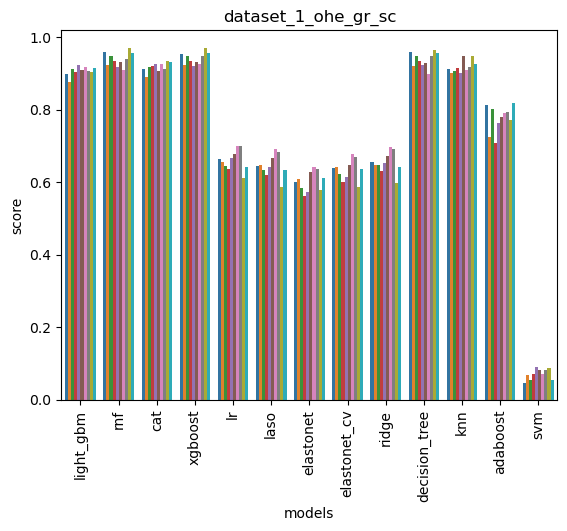

In [41]:
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_with_sc_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('dataset_1_ohe_gr_sc')

# With OHE without scaling

In [100]:
cv_score_with_OHE_no_scalling = pd.read_csv("with OHE without scaling.csv")

In [101]:
cv_score_with_OHE_no_scalling

,0,1,2,3,4,5,6,7,8,9,models
0,0.919066,0.886177,0.913327,0.890234,0.889475,0.901032,0.904798,0.914289,0.905846,0.925708,light_gbm
1,0.957651,0.918816,0.946321,0.932773,0.923085,0.931990,0.911713,0.938737,0.966834,0.959163,rnf
2,0.912922,0.890487,0.917828,0.919113,0.926764,0.905286,0.925771,0.912353,0.933010,0.930742,cat
3,0.952070,0.921516,0.946382,0.932883,0.919478,0.930142,0.925580,0.948762,0.970866,0.955890,xgboost
4,0.664159,0.654358,0.658897,0.639010,0.666394,0.677728,0.699425,0.699520,0.610314,0.641405,lr
5,0.641511,0.635636,0.624111,0.607236,0.640670,0.662957,0.683425,0.685797,0.590699,0.624799,laso
6,0.641517,0.635136,0.624062,0.606932,0.640355,0.662738,0.683334,0.685411,0.590745,0.624627,elastonet
7,0.637052,0.633159,0.619754,0.603604,0.638622,0.663535,0.680702,0.683326,0.588795,0.619772,elastonet_cv
8,0.664253,0.654541,0.658716,0.638900,0.666370,0.677896,0.699621,0.699709,0.610523,0.641652,ridge
9,0.959082,0.919256,0.946789,0.934349,0.922111,0.928538,0.898382,0.946281,0.976222,0.956269,decision_tree


In [106]:
cv_score_with_OHE_no_scalling = cv_score_with_OHE_no_scalling.rename(columns={
    '0': 'CV_1',
    '1': 'CV_2',
    '2': 'CV_3',
    '3': 'CV_4',
    '4': 'CV_5',
    '5': 'CV_6',
    '6': 'CV_7',
    '7': 'CV_8',
    '8': 'CV_9',
    '9': 'CV_10',
})

In [108]:
cv_score_with_OHE_no_scalling.columns

Index(['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9',
       'CV_10', 'models'],
      dtype='object')

In [111]:
cv_score_with_OHE_no_scalling_melt = cv_score_with_OHE_no_scalling.melt(id_vars='models', 
                                                               value_vars= ['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9',
       'CV_10']   )

In [112]:
cv_score_with_OHE_no_scalling_melt

,models,variable,value
0,light_gbm,CV_1,0.919066
1,rnf,CV_1,0.957651
2,cat,CV_1,0.912922
3,xgboost,CV_1,0.952070
4,lr,CV_1,0.664159
...,...,...,...
125,ridge,CV_10,0.641652
126,decision_tree,CV_10,0.956269
127,knn,CV_10,0.923695
128,adaboost,CV_10,0.804375


Text(0.5, 1.0, 'Cross valiation score after one hot encoding without scaling')

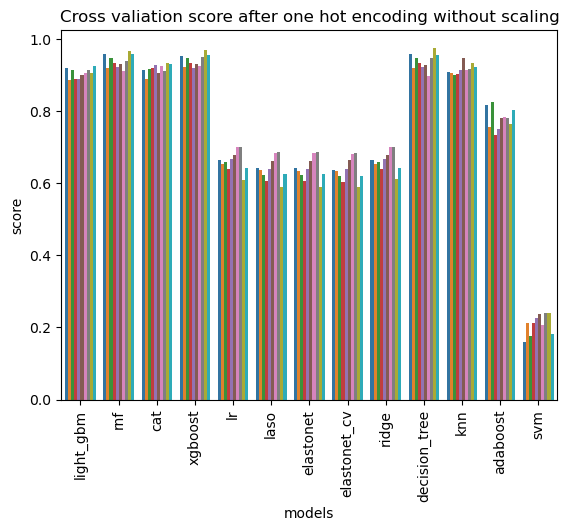

In [144]:
c = sns.barplot(x='models', y='value', hue = 'variable', data=cv_score_with_OHE_no_scalling_melt )
c.set_xticklabels(c.get_xticklabels(), rotation=90);
c.set_ylabel('score')
c.legend_.remove()
c.set_title('Cross valiation score after one hot encoding without scaling')